In [2]:
import pandas as pd

In [3]:
df1 = pd.read_csv('data/house.csv')

In [9]:
df1.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [10]:
df1.shape

(2226382, 12)

In [11]:
df1.describe()

,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,2.221849e+06,2.224841e+06,1.745065e+06,1.714611e+06,1.900793e+06,2.215516e+06,2.226083e+06,1.657898e+06
mean,5.293989e+04,5.241955e+05,3.275841e+00,2.496440e+00,1.522303e+01,1.012325e+06,5.218668e+04,2.714471e+03
std,3.064275e+04,2.138893e+06,1.567274e+00,1.652573e+00,7.628238e+02,5.837635e+05,2.895408e+04,8.081635e+05
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
25%,2.386100e+04,1.650000e+05,3.000000e+00,2.000000e+00,1.500000e-01,5.063128e+05,2.961700e+04,1.300000e+03
50%,5.288400e+04,3.250000e+05,3.000000e+00,2.000000e+00,2.600000e-01,1.012766e+06,4.838200e+04,1.760000e+03
75%,7.918300e+04,5.500000e+05,4.000000e+00,3.000000e+00,9.800000e-01,1.521173e+06,7.807000e+04,2.413000e+03
max,1.101420e+05,2.147484e+09,4.730000e+02,8.300000e+02,1.000000e+05,2.001357e+06,9.999900e+04,1.040400e+09


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB


veri kümesindeki ev ve arazi büyüklüğü ayak kare ile gösteriliyor, bu ikisi ifadeler değerleri metre kare'ye dönüştürülür

In [4]:
df1.loc[:, 'house_size'] = df1['house_size'] * 0.09

In [5]:
df1.loc[:, 'acre_lot'] = df1['acre_lot'] * 4046.86

In [15]:
df1.isnull().sum()

brokered_by         4533
status                 0
price               1541
bed               481317
bath              511771
acre_lot          325589
street             10866
city                1407
state                  8
zip_code             299
house_size        568484
prev_sold_date    734297
dtype: int64

acente bilgileri, ev durumu ve önceki satış tarihi önemsiz bilgileri olduğu için veri kümesinden kaldırdım

In [6]:
df1.drop(['brokered_by', 'status', 'prev_sold_date'], axis=1, inplace=True)

Veri setinde evin ve arsanın büyüklüğü gibi çok önemli eksik bilgiler bulunmakta ve birçok örneğin özelliklerinin yarısı eksiktir. Modelli yanlış bilgilerden etkilenmesini önlemek için, ev ve arasanın büyüklüğü bilgiler eksik olan örnekleri kaldıracağız.

In [7]:
df1.dropna(subset=['price', 'state', 'house_size', 'acre_lot'], axis=0, inplace=True)

In [21]:
df1.shape

(1381351, 12)

In [124]:
df1.isnull().sum()

price             0
bed           14606
bath          17681
acre_lot          0
street         4116
city              0
state             0
zip_code          0
house_size        0
dtype: int64

Eksik sokak değerleri için, öncelikle veri setini il ve şehre göre düzenlememiz gerekir, ardından eksik bilgiler önceki sokak değerleriyle doldurulacaktır çünkü önceki veriler aynı il ve şehre sahip olacaktır.

In [8]:
df1 = df1.sort_values(by=['state', 'city'])

In [9]:
df1.loc[:, 'street'] = df1['street'].ffill()
df1.loc[:, 'zip_code'] = df1['zip_code'].ffill()
df1.loc[:, 'city'] = df1['city'].ffill()

In [33]:
df1.isnull().sum()

price             0
bed           14617
bath          17696
acre_lot          0
street            0
city              0
state             0
zip_code          0
house_size        0
dtype: int64

Bu veri setinde bazı yanlış değerler ve aykırı değerler var, bunların kaldırılması model performansını ve tahminini iyileştirecektir

In [10]:
df2 = df1[~((df1['price'] <= 0) | (df1['house_size'] <= 0))]

Ev büyüklüğünden daha küçük arazi büyüklüğüne sahip verilerin kaldırılması (daireler gibi emlak dahil değildir)

In [11]:
df3 = df2[~((df2['acre_lot'] < df2['house_size']) & (df2['acre_lot'] != 0))]

Yatakların ve banyoların evin kendisinden daha büyük olduğunu gösteren verilerin kaldırılması

In [12]:
df4 = df3[~(df3['bed'] * 1.62 + df3['bath'] * 3.33 > df3['house_size'])]

Metrekare fiyatı çok küçük veya çok büyük olan evler kaldırılıyor

In [13]:
price_per_squared_meter = df4['price'] / df4['house_size']
df5 = df4[~((price_per_squared_meter < 110) | (price_per_squared_meter > 110000))]

Eksik yatak ve banyo bulunan veriler, ev büyüklüğüne göre en fazla bulunan değerle doldurulacaktır

In [14]:
big_house_bed = df5[df5['house_size'] > 900]['bed'].mode()[0]
big_house_bath = df5[df5['house_size'] > 900]['bath'].mode()[0]

average_bed = df5['bed'].mode()[0]
average_bath = df5['bath'].mode()[0]

In [15]:
def fill_bed(house_size):
    if house_size > 900:
        return big_house_bed
    else:
        return average_bed

In [16]:
def fill_bath(house_size):
    if house_size > 900:
        return big_house_bath
    else:
        return average_bath

In [17]:
df5.loc[:, 'bed'] = df5.apply(
    lambda df5_row: fill_bed(df5_row['house_size']) if pd.isnull(df5_row['bed']) else df5_row['bed'], axis=1)
df5.loc[:, 'bath'] = df5.apply(
    lambda df5_row: fill_bath(df5_row['house_size']) if pd.isnull(df5_row['bath']) else df5_row['bath'], axis=1)

il ve şehir değerleri dizedir ve problemimiz bir regresyon problemi olduğundan tüm veri kümesi değerleri sayısal olmalıdır, bu nedenle il ve şehir her değer için ortalama fiyatla değiştirilecektir.

In [18]:
df6 = df5.copy()
state_average_price = df6.groupby('state')['price'].mean()
df6.loc[:, 'state_average_price'] = df6['state'].map(state_average_price)

In [19]:
city_average_price = df6.groupby(['state', 'city'])['price'].mean()
df6['city_average_price'] = df6.apply(lambda df6_row: city_average_price.loc[df6_row['state'], df6_row['city']], axis=1)

Veri setinden il ve şehir dize değerlerini kaldıracağız

In [20]:
df6.drop(['state', 'city'], axis=1, inplace=True)

bu ısı haritası her özellik kombinasyonu için veri korelasyon değerini gösterir, değer ne kadar yüksekse bir özellik diğer bir özellik ile o kadar fazla korelasyona sahiptir

<Axes: >

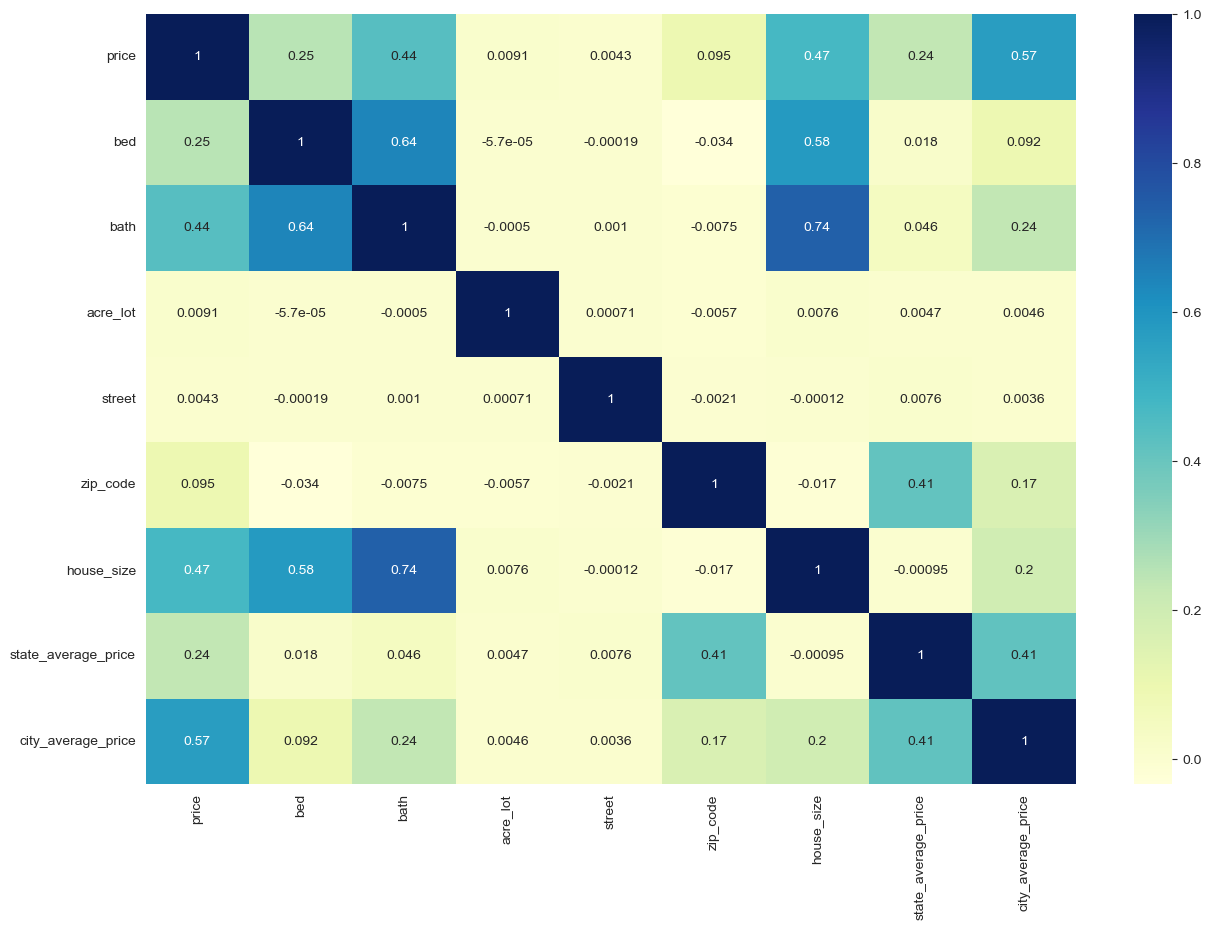

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.heatmap(df6.corr(), annot=True, cmap="YlGnBu")

bu her özellik için bir histogram oluşturur

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bed'}>,
        <Axes: title={'center': 'bath'}>],
       [<Axes: title={'center': 'acre_lot'}>,
        <Axes: title={'center': 'street'}>,
        <Axes: title={'center': 'zip_code'}>],
       [<Axes: title={'center': 'house_size'}>,
        <Axes: title={'center': 'state_average_price'}>,
        <Axes: title={'center': 'city_average_price'}>]], dtype=object)

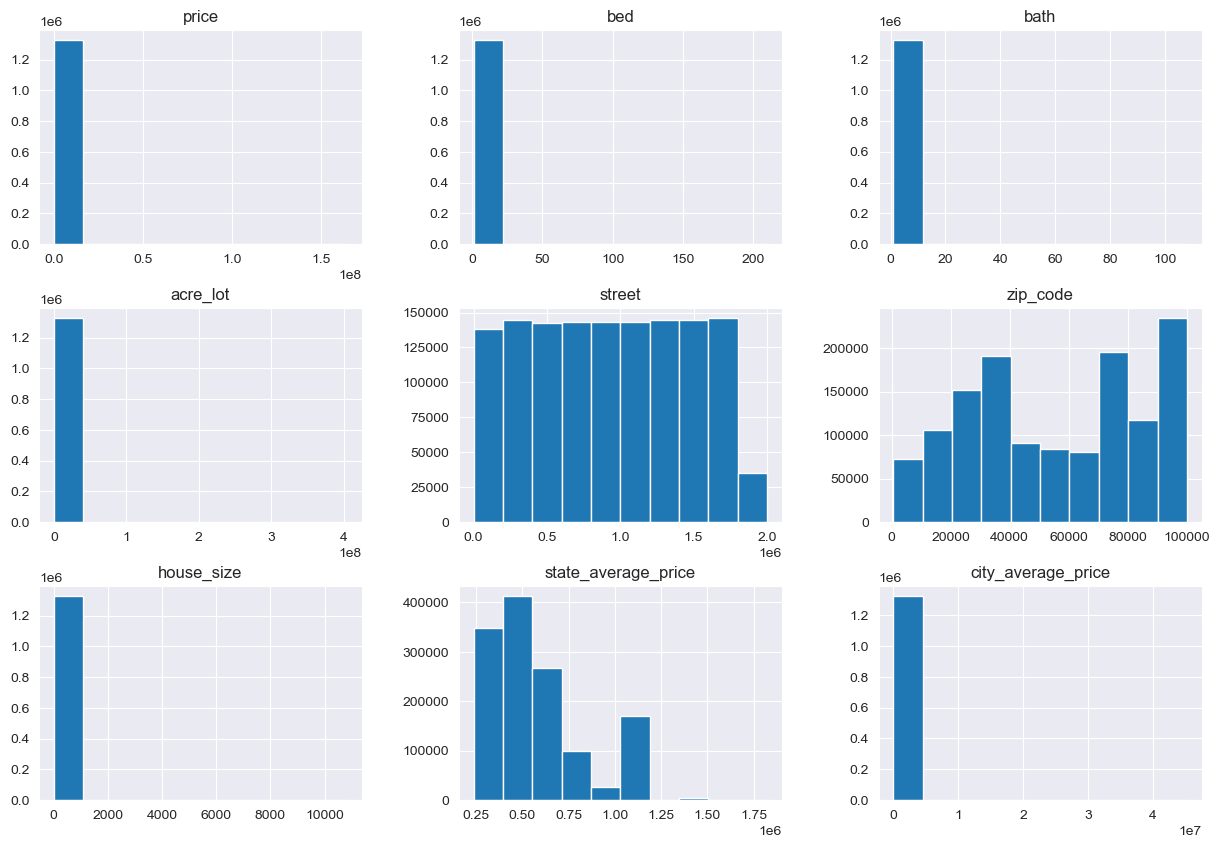

In [137]:
df6.hist(figsize=(15, 10))

Dağılımı daha simetrik ve normale yakın hale getirmek için logaritmik dönüşümü kullanacağız.

In [139]:
import numpy as np

df7 = df6.copy()

df7['price'] = np.log(df7['price']+1)
df7['house_size'] = np.log(df7['house_size']+1)
df7['acre_lot'] = np.log(df7['acre_lot']+1)
df7['city_average_price'] = np.log(df7['city_average_price']+1)
df7['state_average_price'] = np.log(df7['state_average_price']+1)
df7['bath'] = np.log(df7['bath']+1)
df7['bed'] = np.log(df7['bed']+1)

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bed'}>,
        <Axes: title={'center': 'bath'}>],
       [<Axes: title={'center': 'acre_lot'}>,
        <Axes: title={'center': 'street'}>,
        <Axes: title={'center': 'zip_code'}>],
       [<Axes: title={'center': 'house_size'}>,
        <Axes: title={'center': 'state_average_price'}>,
        <Axes: title={'center': 'city_average_price'}>]], dtype=object)

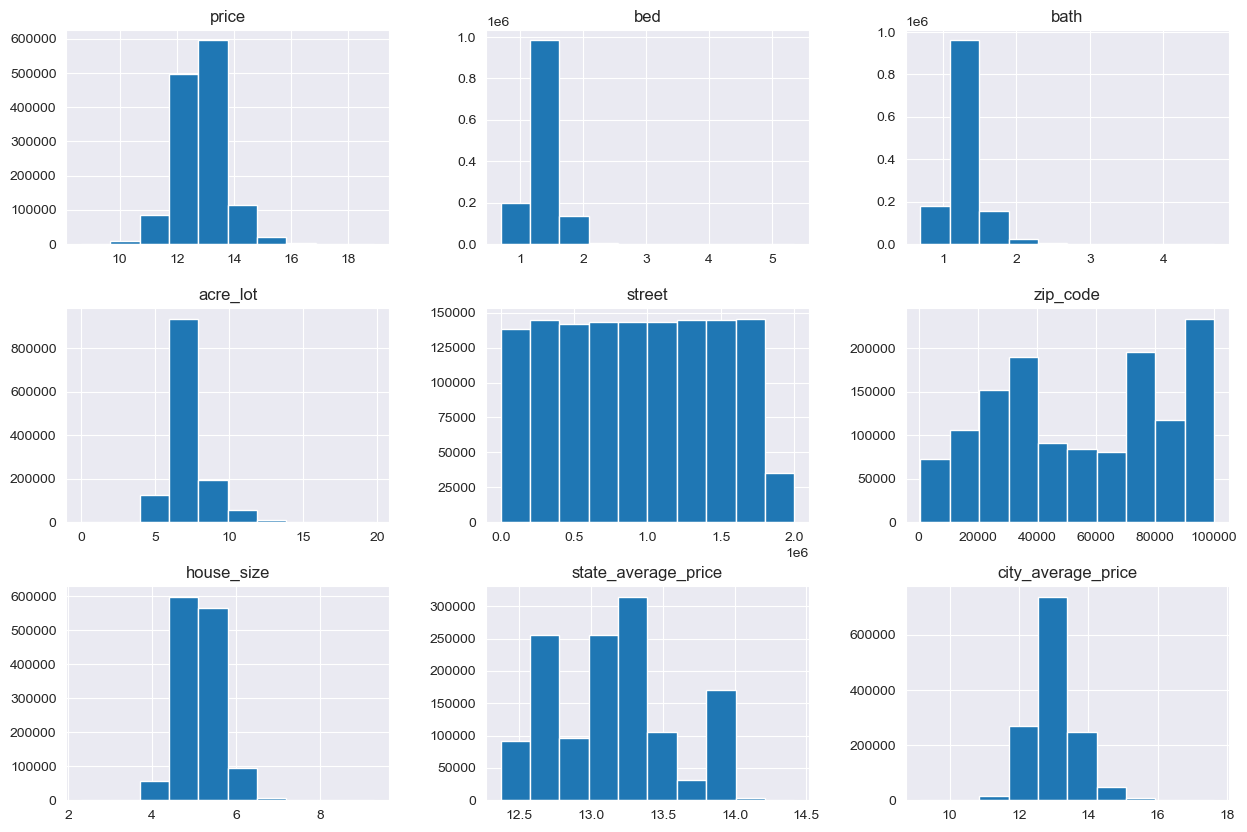

In [142]:
df7.hist(figsize=(15, 10))

Veri seti eğitim verileri ve test verileri olarak ikiye ayrılacak

In [143]:
from sklearn.model_selection import train_test_split

x = df7.drop('price', axis=1)
y = df7['price']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Model Performansını Değerlendirme Fonksiyonu

In [111]:
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


def model_analysis(pred):
    mae = mean_absolute_error(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, pred)

    print(f"Ortalama Karesel Hata {mae}")
    print(f"Ortalama Karesel Hata: {mse}")
    print(f"Kök Ortalama Karesel Hata: {rmse}")
    print(f"R² Skor: {r2}")


Kalıntı analizi görselleştirme fonksiyonu

In [160]:
import matplotlib.pyplot as plt


def residual_analysis(pred):
    residuals = y_test - pred

    plt.scatter(pred, residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted")
    plt.ylabel("Residuals")
    plt.title("Residuals vs. Predicted")
    plt.show()

    sns.histplot(residuals, kde=True)
    plt.title("Histogram of Residuals")
    plt.show()


Doğrusal regresyon kullanarak modelleme

In [144]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression()

In [161]:
y_pred = lin.predict(X_test)

In [146]:
model_analysis(y_pred)

Ortalama Karesel Hata 0.2793196416634453
Ortalama Karesel Hata: 0.14960092025395175
Kök Ortalama Karesel Hata: 0.38678278174442016
R² Skor: 0.7801254542107082


algoritma için farklı puan değerlerini görmek için verileri karıştırma ve bölme işlemi

In [148]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.77963868, 0.78091639, 0.78096996, 0.78118319, 0.78030308])

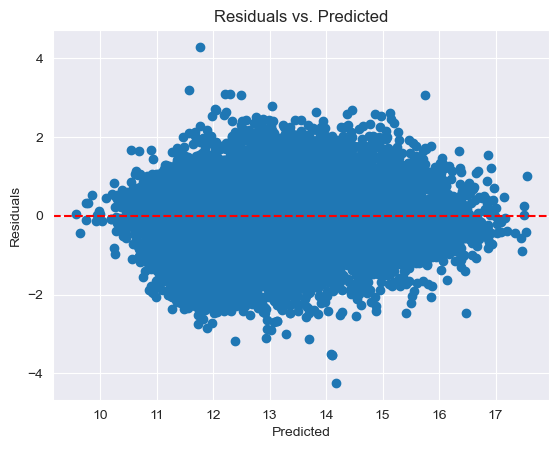

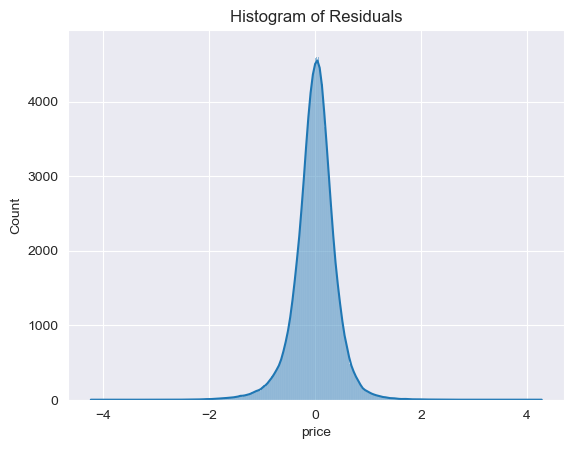

In [162]:
residual_analysis(y_pred)

Rastgele Orman Regresyonu kullanarak modelleme

In [150]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [163]:
y_pred = rf.predict(X_test)

In [152]:
model_analysis(y_pred)

Ortalama Karesel Hata 0.19980377861169216
Ortalama Karesel Hata: 0.09283236678066806
Kök Ortalama Karesel Hata: 0.304684044184575
R² Skor: 0.8635605018619185


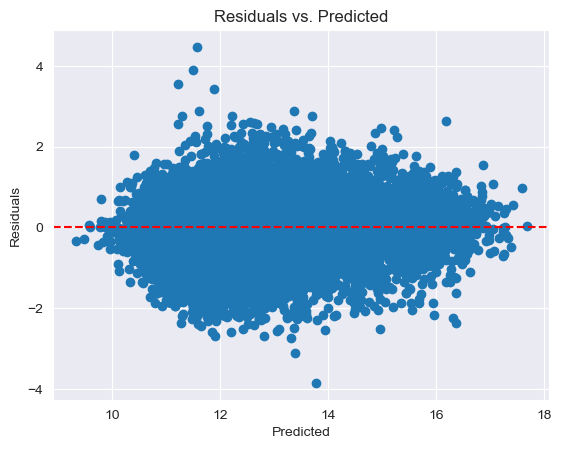

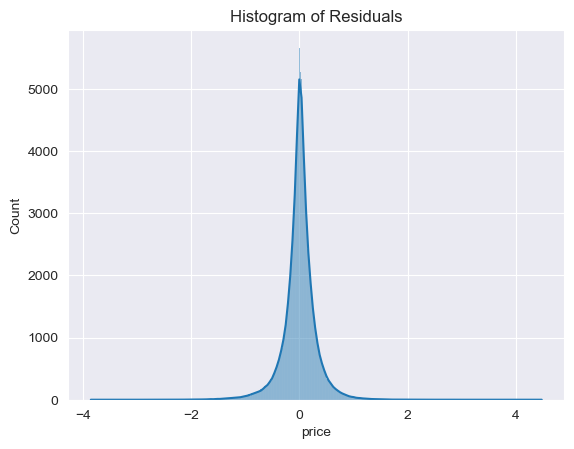

In [164]:
residual_analysis(y_pred)

Gradient Boosting regresyon kullanarak modelleme

In [153]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [165]:
y_pred = gb.predict(X_test)

In [155]:
model_analysis(y_pred)

Ortalama Karesel Hata 0.25930751941944524
Ortalama Karesel Hata: 0.13298999139249035
Kök Ortalama Karesel Hata: 0.3646779283045388
R² Skor: 0.8045392107060034


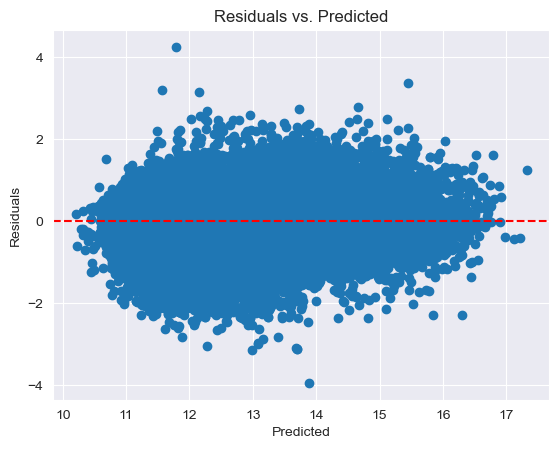

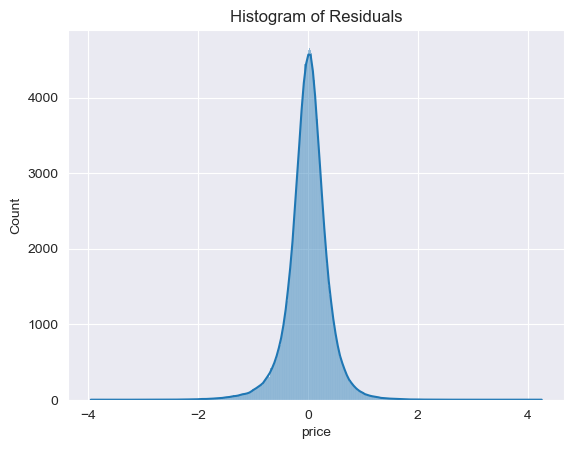

In [167]:
residual_analysis(y_pred)

Malatya Centrality algoritmasını kullanarak emlak fiyatlarını tahmin etmek

In [186]:
df7['price'].describe()

count    1.326197e+06
mean     1.284935e+01
std      8.251452e-01
min      8.646641e+00
25%      1.236947e+01
50%      1.283468e+01
75%      1.330468e+01
max      1.892146e+01
Name: price, dtype: float64

In [169]:
train_data = X_train.join(y_train)

In [170]:
less_than_25 = train_data[train_data['price'] < train_data['price'].describe()['25%']]

between_25_and_50 = train_data[(train_data['price'] > train_data['price'].describe()['25%']) & (
        train_data['price'] < train_data['price'].describe()['50%'])]

between_50_and_75 = train_data[(train_data['price'] > train_data['price'].describe()['50%']) & (
        train_data['price'] < train_data['price'].describe()['75%'])]

above_75 = train_data[train_data['price'] > train_data['price'].describe()['75%']]

In [171]:
less_than_25.shape, between_25_and_50.shape, between_50_and_75.shape, above_75.shape

((261226, 9), (258691, 9), (264693, 9), (264752, 9))

In [172]:
def malatya_centrality(data, size=0):
    if size == 0:
        size = len(data)

    graph = [{'index': 0, 'weight': 0, 'links': [], 'centrality': 0} for _ in range(size)]

    data_array = data.iloc[:size].to_numpy()
    index_array = data.index[:size]

    for i in range(size):
        current_data = data_array[i]
        graph[i]['index'] = index_array[i]

        for j in range(i):
            compare_by_data = data_array[j]
            similarities = (current_data[:8] == compare_by_data[:8]).sum()
            if similarities > 0:
                graph[i]['links'].append({'name': index_array[j], 'similarities': similarities})
                graph[j]['links'].append({'name': index_array[i], 'similarities': similarities})
                graph[i]['weight'] += similarities
                graph[j]['weight'] += similarities

    return graph

In [ ]:
graph_less_than_25 = malatya_centrality(less_than_25, 1000)
graph_between_25_and_50 = malatya_centrality(between_25_and_50, 1000)
graph_between_50_and_75 = malatya_centrality(between_50_and_75, 1000)
graph_above_75 = malatya_centrality(above_75, 1000)

In [ ]:
def data_centrality(data_point, graph):
    tmp_graph = graph.copy()
    tmp_graph.append({'index': 0, 'weight': 0, 'links': [], 'centrality': 0})
    for i in range(len(tmp_graph) - 1):
        compare_by_data = train_data.loc[tmp_graph[i]['index']]
        similarities = (data_point[:8] == compare_by_data[:8]).sum()
        if similarities > 0:
            tmp_graph[-1]['links'].append({'name': tmp_graph[i]['index'], 'similarities': similarities})
            tmp_graph[-1]['weight'] += similarities
            tmp_graph[i]['weight'] += similarities

    centrality = 0
    for link in tmp_graph[-1]['links']:
        centrality += (
                tmp_graph[-1]['weight'] / next((node for node in tmp_graph if node['index'] == link["name"]), None)[
            'weight'])

    return centrality, tmp_graph


In [174]:
def compare_centrality(data):
    c1, graph1 = data_centrality(data, graph_less_than_25)
    c2, graph2 = data_centrality(data, graph_between_25_and_50)
    c3, graph3 = data_centrality(data, graph_between_50_and_75)
    c4, graph4 = data_centrality(data, graph_above_75)

    centrality_list = [c1, c2, c3, c4]
    graph_index = centrality_list.index(max(centrality_list))

    if graph_index == 0:
        return graph1
    if graph_index == 1:
        return graph2
    if graph_index == 2:
        return graph3
    else:
        return graph4

In [175]:
def predict_price(data_point):
    best_graph = compare_centrality(data_point)

    predicted_price = 0
    for link in best_graph[-1]['links']:
        rate = link['similarities'] / best_graph[-1]['weight']
        predicted_price += (rate * y_train.loc[link['name']])
    return predicted_price


In [181]:
y_pred = pd.DataFrame({'price': [predict_price(data_point) for data_point in X_test.head(2000).itertuples(index=False)]})

In [193]:
malatya_centrality_r2 = r2_score(y_test.head(2000), y_pred)
print(f"r2 skor: {malatya_centrality_r2}")

r2 skor: -0.07606651392346642
